In [1]:
import torch
import torch.nn as nn

import torchvision.transforms as transforms
import torch.utils.data as data_utils
from torch.utils.data import TensorDataset, DataLoader
from torchvision.datasets.mnist import MNIST
from torchvision import datasets
import cv2
from model import Generator, Discriminator
from train import train_DCGAN
import matplotlib.pyplot as plt
import random

device = torch.device("cuda" if torch.cuda.is_available()  else "cpu")

In [2]:
print(torch.__version__)

1.8.1+cu102


### Code for loading the numpy array of different datasets, two numpy arrays can be created separately for Jazz and classical and they can be concatenated

In [3]:
import pandas as pd
import numpy as np
import os

from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

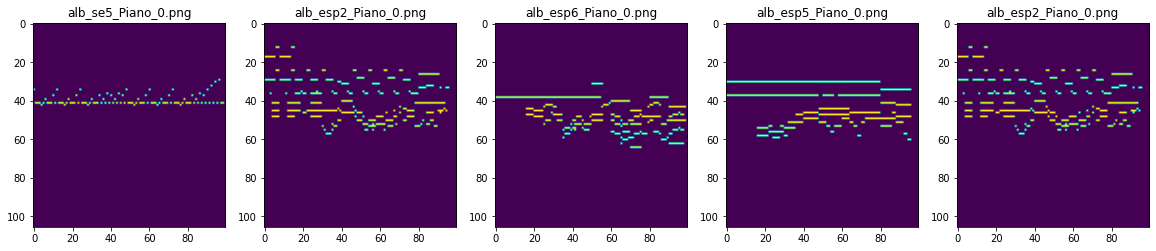

In [4]:
plt.figure(figsize=(20,20))
test_folder='./image_data/albeniz/'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

    

In [5]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path= os.path.join(img_folder,os.path.join(dir1, file))
            image = mpimg.imread(image_path)
            image=np.array(image)
#            img = image.astype('float32')
            
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset('./image_data/')

In [6]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict

{'albeniz': 0,
 'bach': 1,
 'balakir': 2,
 'beeth': 3,
 'borodin': 4,
 'brahms': 5,
 'burgm': 6,
 'chopin': 7,
 'debussy': 8,
 'granados': 9,
 'grieg': 10,
 'haydn': 11,
 'liszt': 12,
 'mendelssohn': 13,
 'mozart': 14,
 'muss': 15,
 'schubert': 16,
 'schumann': 17,
 'tschai': 18}

In [7]:
target_dict['bach']

1

In [8]:
target_val=  torch.tensor([target_dict[class_name[i]] for i in range(len(class_name))])

In [9]:
target_val

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  2,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  5,
         5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,
         7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
         7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
         7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,
         8,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
        11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
        13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
        14, 14, 14, 14, 14, 14, 15, 15, 

```python
import numpy as np
import matplotlib.pyplot as plt
with open("numpy_data.npy","rb") as f:
    pixels = np.load(f)
```

```python
pixels = np.resize(pixels,(1201,1,128 ,128))
```

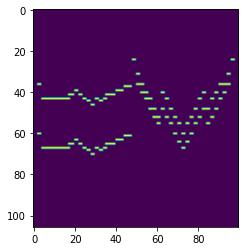

In [10]:
plt.imshow(img_data[0])

In [11]:
img_data[0].max()

1.0

In [12]:
import torchvision
from PIL import Image


```python
for k in range(np.array(img_data).shape[0]):
    for i in range(np.array(img_data).shape[1]):
        for j in range(np.array(img_data).shape[2]):
            if img_data[k][i][j]>0:
                img_data[k][i][j]=255
            else:
                img_data[k][i][j]=0
```

In [13]:
img_data[0].max()

1.0

In [14]:
np_pil_im_arr=[]
for i in range(np.array(img_data).shape[0]):
    new_im = Image.fromarray(img_data[i])
    #x = torchvision.transforms.functional.resized_crop(new_im,i=1,j=7,h=99, w=99,size=(99,99))
    x=torchvision.transforms.functional.pad(new_im,(28,22,0,0),fill=0)
    np_pil_im_arr.append(np.array(x))


In [15]:
np_pil_im_arr[0].shape

(128, 128)

In [16]:
len(np_pil_im_arr)

295

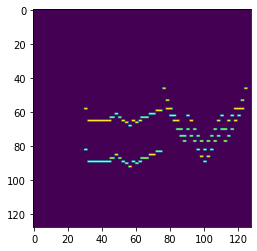

In [17]:
plt.imshow(np_pil_im_arr[0])

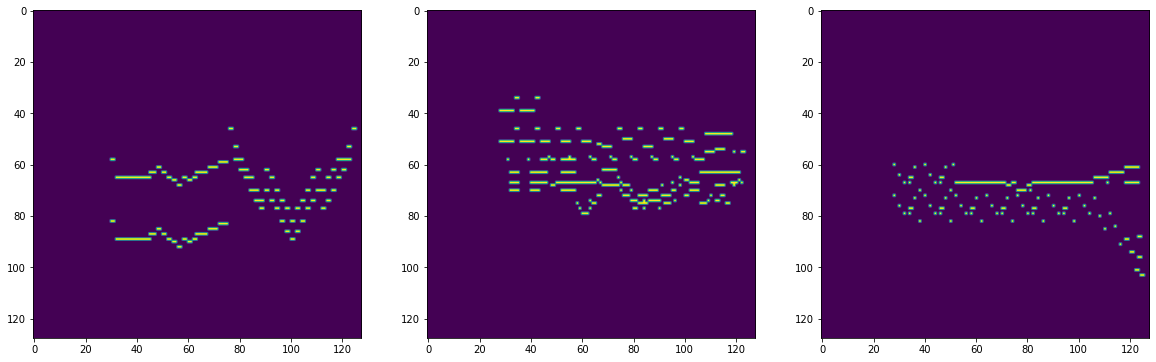

In [18]:
plt.figure(figsize=(20,20))
test_folder='./image_data/albeniz/'
for i in range(3):
    ax=plt.subplot(1,3,i+1)
    plt.imshow(np.array(np_pil_im_arr[i]))


In [19]:
img_data=np.resize(np_pil_im_arr,(295,1,128,128))

Preprocessing data 

In [20]:
np.array(img_data).shape 

(295, 1, 128, 128)

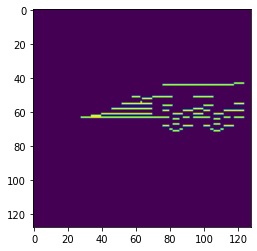

In [21]:
plt.imshow(img_data[7][0])

### create separate labels for classical dataset namely label = 2 and then concatnate both the labels. 

```python
labels = np.array([1]*len(pixels))
```

### Create train data for both the datsets. 

In [22]:
train_data = []
for i in range(len(img_data)):
    train_data.append([img_data[i], target_val[i]])

In [23]:
g_lr = 0.0002
d_lr = 0.0002
batch_size = 40
num_epochs = 3
n_class = 19

In [24]:

#train_set = MNIST(root='.', train=True, transform=trans, download=True)
train_loader = data_utils.DataLoader(train_data, batch_size=batch_size, shuffle=True)


In [25]:
def label2onehot(labels):
    uni_labels = np.unique(labels)
    k = 0
    dic = {}
    for l in uni_labels:
        dic[str(l.item())] = k
        k += 1
    onehot=[]
    for (i, l) in enumerate(labels):
        onehot.append( dic[str(l)])
    return onehot


def CrossEntropy_uniform(pred,batch_size,n_class):
    logsoftmax = nn.LogSoftmax(dim=1)
    invert = 1/n_class
    unif = torch.full((batch_size, n_class), invert ).to(device)
    inner = unif * logsoftmax(pred)
    outer = -torch.sum(inner, 1)
    result = torch.mean(outer) 
    return result

In [26]:

n_class = 19
G = Generator().to(device)
D = Discriminator().to(device)

optim_G = torch.optim.Adam(G.parameters(), lr=g_lr, betas=(0.05, 0.999))
optim_D = torch.optim.Adam(D.parameters(), lr=d_lr, betas=(0.05, 0.999))

loss_f1 = nn.BCELoss()
loss_f2 = nn.CrossEntropyLoss()




.
[0/3][0/8]	Loss_D: 17.7014	Loss_G: 90.6058	D(x): 0.9997	D(G(z)): 0.0000 / 0.0000


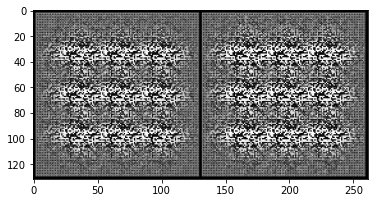

.
.
.
.
.
[0/3][5/8]	Loss_D: 6.2260	Loss_G: 50.0359	D(x): 0.9965	D(G(z)): 0.0000 / 0.0000


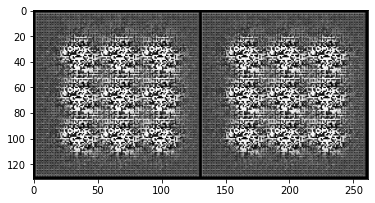

.
.
.
[1/3][0/8]	Loss_D: 57.5743	Loss_G: 137.7448	D(x): 0.0000	D(G(z)): 0.0000 / 0.0000


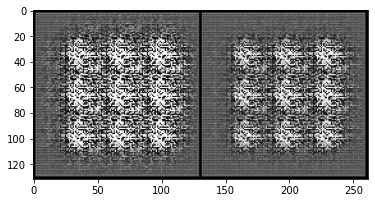

.
.
.
.
.
[1/3][5/8]	Loss_D: 3.8069	Loss_G: 80.0249	D(x): 0.9993	D(G(z)): 0.0000 / 0.0000


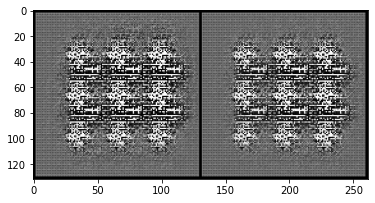

.
.
.
[2/3][0/8]	Loss_D: 2.8364	Loss_G: 60.6776	D(x): 0.9989	D(G(z)): 0.0000 / 0.0000


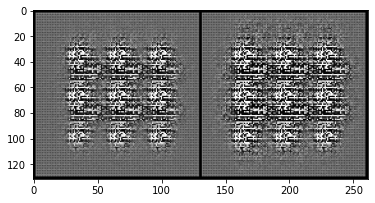

.
.
.


RuntimeError: CUDA out of memory. Tried to allocate 1024.00 MiB (GPU 0; 15.74 GiB total capacity; 11.56 GiB already allocated; 372.94 MiB free; 14.29 GiB reserved in total by PyTorch)

In [28]:
train_DCGAN(G, D, optim_G, optim_D, loss_f1, loss_f2, train_loader, num_epochs, label2onehot, 
            CrossEntropy_uniform, n_class,
            device)

In [ ]:
train_DCGAN(G, D, optim_G, optim_D, loss_f1, loss_f2, train_loader, 1, label2onehot, 
            CrossEntropy_uniform, n_class,
            device)

In [ ]:
from torchvision.utils import make_grid
noise = torch.randn(1, 100, device=device)
img_fake = G(noise)
grid = make_grid(img_fake)
img=grid.permute(1, 2, 0).detach().cpu().numpy()
plt.imshow(img)
plt.show()

In [ ]:
torch.save(G.state_dict(), './G.pt')

In [ ]:
torch.save(D.state_dict(), './D.pt')

In [ ]:
img.min()

In [ ]:
img=img[:,:,1]

In [ ]:
img.shape

In [ ]:
for i in range(128):
    for j in range(128):
        if img[i][j]>0.1:
            img[i][j]=255
        else:
            img[i][j]=0

In [ ]:

plt.imshow(img)
plt.show()

In [ ]:
from PIL import Image
import numpy as np
from music21 import instrument, note, chord, stream

lowerBoundNote = 21
def column2notes(column):
    notes = []
    for i in range(len(column)):
        if column[i] >0:
            notes.append(i+lowerBoundNote)
    return notes

resolution = 0.25
def updateNotes(newNotes,prevNotes): 
    res = {} 
    for note in newNotes:
        if note in prevNotes:
            res[note] = prevNotes[note] + resolution
        else:
            res[note] = resolution
    return res

def image2midi(image):
    im_arr = np.flip(image, 0) #np.frombuffer(image.tobytes(), dtype=np.uint8)
    try:
        im_arr = im_arr.reshape((image.shape[0], image.shape[1]))
    except:
        im_arr = im_arr.reshape((image.shape[0], image.shape[1],3))
        im_arr = np.dot(im_arr, [0.33, 0.33, 0.33])

    """ convert the output from the prediction to notes and create a midi file
        from the notes """
    offset = 0
    output_notes = []

    # create note and chord objects based on the values generated by the model

    prev_notes = updateNotes(im_arr.T[0,:],{})
    for column in im_arr.T[1:,:]:
        notes = column2notes(column)
        # pattern is a chord
        notes_in_chord = notes
        old_notes = prev_notes.keys()
        for old_note in old_notes:
            if not old_note in notes_in_chord:
                new_note = note.Note(old_note,quarterLength=prev_notes[old_note])
                new_note.storedInstrument = instrument.Piano()
                if offset - prev_notes[old_note] >= 0:
                    new_note.offset = offset - prev_notes[old_note]
                    output_notes.append(new_note)
                elif offset == 0:
                    new_note.offset = offset
                    output_notes.append(new_note)                    
                else:
                    print(offset,prev_notes[old_note],old_note)

        prev_notes = updateNotes(notes_in_chord,prev_notes)

        # increase offset each iteration so that notes do not stack
        offset += resolution

    for old_note in prev_notes.keys():
        new_note = note.Note(old_note,quarterLength=prev_notes[old_note])
        new_note.storedInstrument = instrument.Piano()
        new_note.offset = offset - prev_notes[old_note]

        output_notes.append(new_note)

    prev_notes = updateNotes(notes_in_chord,prev_notes)

    midi_stream = stream.Stream(output_notes)

    midi_stream.write('midi', fp="generated_creative_12.mid")

import sys
#image_path = './image_data/albeniz/alb_esp1_Piano_0.png'
image2midi(img)

In [ ]:
377110/(288*432)

In [ ]:
497664/432/384

In [ ]:
128*3

In [ ]:
99*99

In [ ]:
a+=2 #inplace no copy operates directly on var 

a=a+2 #normal makes copy 